# Support Vector Machine (SVM)

## Importing the libraries

In [2]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in d:\program\anaconda\lib\site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

## Importing the dataset

In [5]:
dataset = pd.read_csv('dataset.csv')
dataset['workclass'] =dataset['workclass'].replace(' ?',"unknown")
dataset['occupation'] =dataset['occupation'].replace(' ?',"unknown")
dataset['place'] =dataset['place'].replace(' ?',"unknown")

In [6]:
LE1 = LabelEncoder()
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [7]:
transformers=[('encoder',OneHotEncoder(sparse=False,drop='first'),[1,2,3,4,5,6,8])]
ct =ColumnTransformer(transformers,remainder ="passthrough")
X = np.array(ct.fit_transform(X))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
print(X_train)

[[1.0 0.0 0.0 ... 0.0 36 40]
 [0.0 0.0 0.0 ... 0.0 35 54]
 [0.0 0.0 0.0 ... 0.0 38 50]
 ...
 [0.0 0.0 0.0 ... 0.0 23 40]
 [1.0 1.0 0.0 ... 0.0 45 45]
 [1.0 0.0 0.0 ... 0.0 25 48]]


In [9]:
print(y_train)

[0 0 0 ... 0 1 0]


In [10]:
print(X_test)

[[0.0 0.0 0.0 ... 0.0 27 44]
 [0.0 0.0 0.0 ... 0.0 27 40]
 [1.0 0.0 0.0 ... 0.0 25 40]
 ...
 [1.0 0.0 0.0 ... 0.0 44 60]
 [1.0 0.0 0.0 ... 0.0 53 40]
 [1.0 0.0 0.0 ... 0.0 47 50]]


In [11]:
print(y_test)

[0 0 0 ... 1 0 1]


In [12]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(26048, 91)
(6513, 91)
(26048,)
(6513,)


## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
print(X_train)

[[ 0.7024901  -0.26231907 -0.01517884 ... -0.13657944 -0.18928087
  -0.03473164]
 [-1.4235076  -0.26231907 -0.01517884 ... -0.13657944 -0.26265957
   1.10745038]
 [-1.4235076  -0.26231907 -0.01517884 ... -0.13657944 -0.04252347
   0.78111266]
 ...
 [-1.4235076  -0.26231907 -0.01517884 ... -0.13657944 -1.14320394
  -0.03473164]
 [ 0.7024901   3.81215143 -0.01517884 ... -0.13657944  0.47112741
   0.37319051]
 [ 0.7024901  -0.26231907 -0.01517884 ... -0.13657944 -0.99644654
   0.6179438 ]]


In [15]:
print(X_test)

[[-1.4235076  -0.26231907 -0.01517884 ... -0.13657944 -0.84968915
   0.29160608]
 [-1.4235076  -0.26231907 -0.01517884 ... -0.13657944 -0.84968915
  -0.03473164]
 [ 0.7024901  -0.26231907 -0.01517884 ... -0.13657944 -0.99644654
  -0.03473164]
 ...
 [ 0.7024901  -0.26231907 -0.01517884 ... -0.13657944  0.39774871
   1.59695696]
 [ 0.7024901  -0.26231907 -0.01517884 ... -0.13657944  1.05815699
  -0.03473164]
 [ 0.7024901  -0.26231907 -0.01517884 ... -0.13657944  0.6178848
   0.78111266]]


In [16]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(26048, 91)
(6513, 91)
(26048,)
(6513,)


## Training the SVM model on the Training set

In [17]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Predicting the Test set results

In [18]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 1]]


In [19]:
classifier.score(X_test,y_test)

0.8258866881621373

## Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4577  341]
 [ 793  802]]


0.8258866881621373

## Visualising the Roc curve

D:\program\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


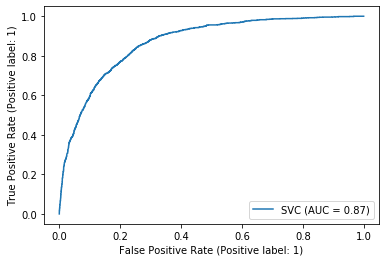

In [21]:
metrics.plot_roc_curve(classifier, X_test, y_test)
plt.show()